In [38]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


### Steps

### 0. Preprocess + EDA + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train test split
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the model

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
import matplotlib.pyplot as plt

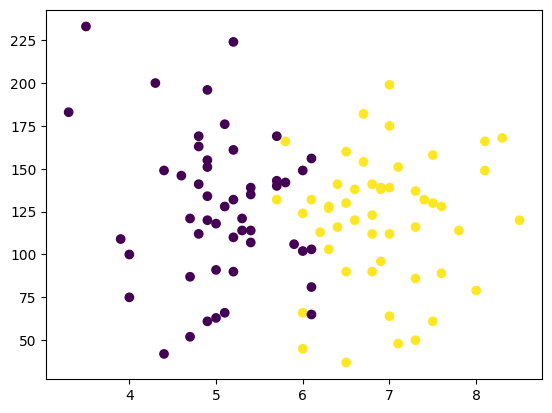

In [10]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])
plt.style.use('default')

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
y.shape

(100,)

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
76,4.9,155.0
55,7.8,114.0
62,6.0,102.0
1,5.9,106.0
48,6.6,138.0
...,...,...
51,4.8,141.0
38,6.5,160.0
99,6.2,113.0
41,5.4,114.0


In [19]:
y_train

76    0
55    1
62    0
1     0
48    1
     ..
51    0
38    1
99    1
41    0
65    1
Name: placement, Length: 90, dtype: int64

In [20]:
x_test

,cgpa,iq
14,6.1,103.0
63,6.3,128.0
28,5.2,90.0
45,6.0,66.0
43,6.8,141.0
52,7.0,175.0
3,7.4,132.0
70,6.3,127.0
53,8.3,168.0
66,6.9,96.0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
x_train = scaler.fit_transform(x_train)

In [24]:
x_train

array([[-0.88935453,  0.77394057],
       [ 1.63920247, -0.23948764],
       [ 0.0697533 , -0.53610078],
       [-0.01743832, -0.43722974],
       [ 0.59290302,  0.35373863],
       [ 1.46481923,  0.10656102],
       [ 1.90077733,  0.62563401],
       [-0.19182157,  0.40317415],
       [-1.41250425,  1.88623984],
       [-0.80216291, -1.50009348],
       [ 1.20324436,  0.32902087],
       [-0.10462994,  0.45260968],
       [-1.06373777, -1.77198885],
       [ 0.33132816, -0.51138302],
       [ 1.46481923, -0.85743168],
       [-1.32531263, -2.01916647],
       [ 0.9416695 , -0.28892317],
       [-0.88935453,  0.25486758],
       [ 0.0697533 ,  0.00768997],
       [ 0.76728626, -0.28892317],
       [-1.76127074, -0.36307645],
       [ 0.15694492, -1.05517377],
       [-0.88935453,  0.67506953],
       [-1.15092939,  0.55148072],
       [ 1.37762761,  0.15599654],
       [ 1.02886112,  0.67506953],
       [-0.71497129,  1.29301357],
       [-0.54058805, -0.06646331],
       [ 1.02886112,

In [25]:
x_test = scaler.transform(x_test)

In [26]:
x_test

array([[ 0.15694492, -0.51138302],
       [ 0.33132816,  0.10656102],
       [-0.62777967, -0.83271392],
       [ 0.0697533 , -1.42594019],
       [ 0.76728626,  0.42789191],
       [ 0.9416695 ,  1.2682958 ],
       [ 1.29043598,  0.20543206],
       [ 0.33132816,  0.08184325],
       [ 2.07516057,  1.09527147],
       [ 0.85447788, -0.68440735]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

### training data using fit called model training

In [29]:
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
clf.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [31]:
y_test

14    0
63    1
28    0
45    1
43    1
52    1
3     1
70    1
53    1
66    1
Name: placement, dtype: int64

In [32]:
y_pred = clf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

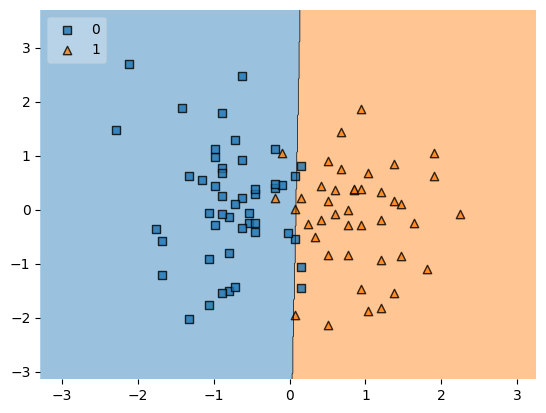

In [36]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [37]:
import pickle

In [66]:
pickle.dump(clf, open('model.pkl', 'wb'))